In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data=pd.read_csv("Market Segmentation.csv")
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Satisfaction    30 non-null int64
Loyalty         30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [5]:
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


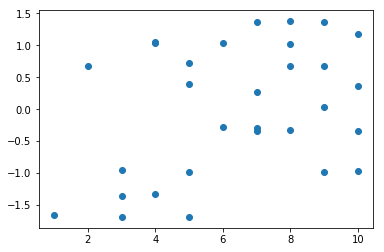

In [7]:
plt.scatter(data["Satisfaction"],data["Loyalty"])

In [8]:
cluster_parameters=data.iloc[:,0:2]
cluster_parameters

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


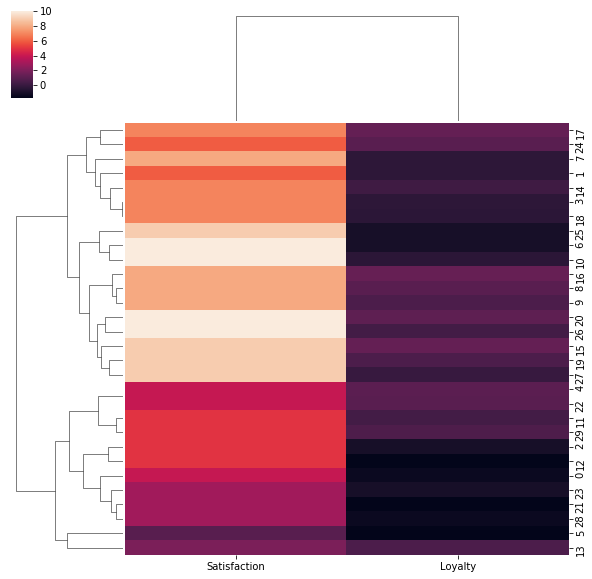

In [49]:
sns.clustermap(cluster_parameters)

In [19]:
#Let us consider 3 clusters

Kmeans=KMeans(2)

In [20]:
Kmeans.fit(cluster_parameters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
Kmeans.inertia_

74.51511402714932

In [22]:
predicted_clusters=Kmeans.fit_predict(cluster_parameters)
predicted_clusters

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0], dtype=int32)

In [23]:
data_copy=data.copy()
data_copy.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [24]:
data_copy["Pred_clusters"]=predicted_clusters
data_copy

,Satisfaction,Loyalty,Pred_clusters
0,4,-1.33,0
1,6,-0.28,0
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


<function matplotlib.pyplot.show(*args, **kw)>

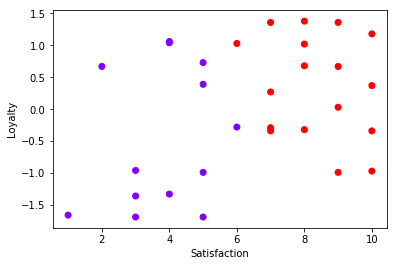

In [25]:
plt.scatter(data["Satisfaction"],data["Loyalty"],c=data_copy["Pred_clusters"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show

In [ ]:
#Hence from the above graph it is clear that the Clustering is based in "Satisfaction" parameter only and not the "Loyalty" parameter
#Hence we need to Standardize the Data 

In [36]:
#from sklearn.preprocessing import StandardScaler
#s=StandardScaler(cluster_parameters)
#s

from sklearn import preprocessing
x_scaled=preprocessing.scale(cluster_parameters)
x_scaled

/Users/nikhilshetty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

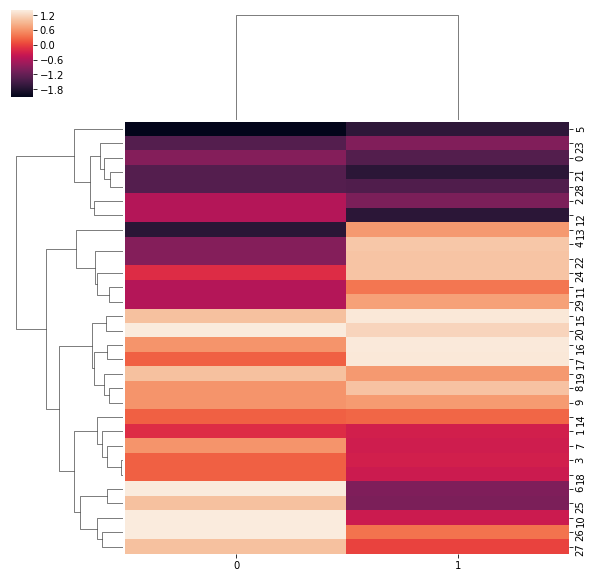

In [47]:
sns.clustermap(x_scaled)

In [38]:
wcss=[]

for i in range(1,10):
    x=KMeans(i)
    x.fit(x_scaled)
    wcss.append(x.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.34807941029098,
 4.352037765292862,
 3.9341713216957164]

Text(0,0.5,'wcss')

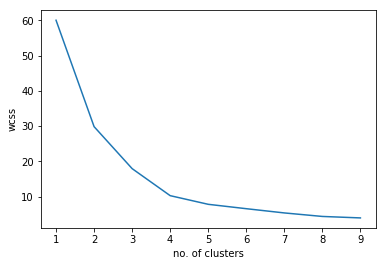

In [40]:
plt.plot(range(1,10),wcss)
plt.xlabel("no. of clusters")
plt.ylabel("wcss")

In [41]:
data_copy2=data.copy()
data_copy2.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [42]:
Kmeans=KMeans(2)
Kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
Kmeans.inertia_

29.818973034723147

In [44]:
predicted_clusters=Kmeans.fit_predict(x_scaled)
predicted_clusters

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1], dtype=int32)

In [45]:
data_copy2["Pred_clusters"]=predicted_clusters
data_copy2

,Satisfaction,Loyalty,Pred_clusters
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,0
3,7,-0.29,1
4,4,1.06,1
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


<function matplotlib.pyplot.show(*args, **kw)>

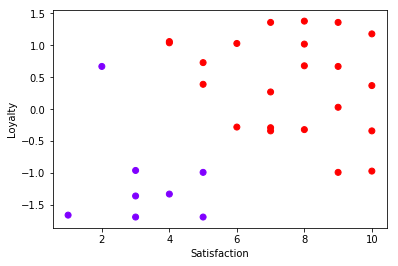

In [46]:
plt.scatter(data["Satisfaction"],data["Loyalty"],c=data_copy2["Pred_clusters"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show